In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import math
import matplotlib
import pandas
import glob
import ast
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [3]:
from diameter_tools import get_trunk_diam

In [4]:
def load_data() -> pandas.DataFrame:
    a = glob.glob('data/trees_*.csv')

    data = None
    l = []
    for f in a:
        dataset = pandas.read_csv(f)
        l.append(dataset)
    data = pandas.concat(l)
    return data

data = load_data()


/home/sireliah/.virtualenvs/trees/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [5]:
data.set_index('id')


,Aktualność danych na dzień,Jednostka zarządzająca,Nazwa polska,Nazwa łacińska,Numer inwentaryzacyjny,Obwód pnia w cm,Wysokość w m,gtype,height,imgurl,width,x,y
id,,,,,,,,,,,,,
AALAK7AAnAAINEHAAf,10.04.2013,Dzielnica Bemowo,orzech włoski,Juglans regia,D319464,"40, 33, 18",4,2001,1,http://mapa.um.warszawa.pl/mvimages/san12/fig/...,1,7.491011e+06,5.790674e+06
AALAK7AAnAAINEHAAg,10.04.2013,Dzielnica Bemowo,wierzba sp.,Salix sp.,D319465,"1, 2",2,2001,1,http://mapa.um.warszawa.pl/mvimages/san12/fig/...,1,7.491011e+06,5.790672e+06
AALAK7AAnAAINHWAAi,07.05.2013,Zarząd Zieleni m.st. Warszawy,lipa drobnolistna,Tilia cordata,D325689,"75, 75",6,2001,2,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,2,7.491015e+06,5.784895e+06
AALAK7AAnAAINHWAAj,07.05.2013,Zarząd Zieleni m.st. Warszawy,grab sp.,Carpinus sp.,D325690,5,3,2001,1,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1,7.491017e+06,5.784892e+06
AALAK7AAnAAINHWAAk,07.05.2013,Zarząd Zieleni m.st. Warszawy,grab sp.,Carpinus sp.,D325691,5,3,2001,1,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1,7.491018e+06,5.784893e+06
AALAK7AAnAAINHWAAl,07.05.2013,Zarząd Zieleni m.st. Warszawy,grab sp.,Carpinus sp.,D325692,5,3,2001,1,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1,7.491019e+06,5.784894e+06
AALAK7AAnAAINHaAAA,07.05.2013,Zarząd Zieleni m.st. Warszawy,grab sp.,Carpinus sp.,D325693,5,3,2001,1,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1,7.491021e+06,5.784895e+06
AALAK7AAnAAINHaAAB,07.05.2013,Zarząd Zieleni m.st. Warszawy,grab sp.,Carpinus sp.,D325694,5,3,2001,1,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1,7.491022e+06,5.784896e+06
AALAK7AAnAAINHaAAC,07.05.2013,Zarząd Zieleni m.st. Warszawy,grab sp.,Carpinus sp.,D325695,5,3,2001,1,http://mapa.um.warszawa.pl/mvimages/san13/fig/...,1,7.491024e+06,5.784897e+06


In [6]:
data['Obwód pnia w cm'].isna().sum()

2461

In [7]:
data['Wysokość w m'].isna().sum()

10070

In [8]:
def get_species_list(data: pandas.DataFrame) -> pandas.DataFrame:
    sp = pandas.DataFrame()
    sp['Nazwa łacińska'] = data['Nazwa łacińska']
    sp['Nazwa polska'] = data['Nazwa polska']
    species_unique = sp.drop_duplicates()
    return species_unique

species_unique = get_species_list(data)


In [9]:
data['norm'] = data['Obwód pnia w cm'].fillna('0')
data.dropna(subset=['Obwód pnia w cm', 'norm',], inplace=True)
data['norm'] = data['norm'].apply(pandas.Series)

In [10]:
data['normalized_trunk_diam'] = data['norm'].apply(get_trunk_diam)
data['normalized_trunk_diam'] = data['normalized_trunk_diam'] / 100

In [11]:
data['height'] = data['Wysokość w m'].fillna('0')
data['height'] = data['height'].str.replace(',', '.')
data['height'] = data['height'].astype(np.float)

In [12]:
df2 = data[['height', 'normalized_trunk_diam']]

In [13]:
df2.dropna(inplace=True)

/home/sireliah/.virtualenvs/trees/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130848 entries, 0 to 197728
Data columns (total 2 columns):
height                   130848 non-null float64
normalized_trunk_diam    130848 non-null float64
dtypes: float64(2)
memory usage: 3.0 MB


In [15]:
df2.head()

,height,normalized_trunk_diam
0,4.0,0.174723
1,2.0,0.007118
2,6.0,0.337619
3,3.0,0.015915
4,3.0,0.015915


In [16]:
df2.corr()

,height,normalized_trunk_diam
height,1.000000,0.438544
normalized_trunk_diam,0.438544,1.000000


In [17]:
df2.describe()

,height,normalized_trunk_diam
count,130848.000000,130848.000000
mean,8.955453,0.250416
std,10.003814,0.209325
min,0.000000,0.000000
25%,4.000000,0.082761
50%,8.000000,0.197352
75%,13.000000,0.362873
max,1402.000000,7.069663


Text(0.5, 1.0, 'Wykres wysokości drzew od średnicy pni')

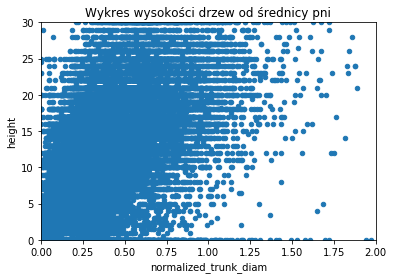

In [18]:
df2.plot(kind='scatter', x='normalized_trunk_diam', y='height', ylim=(0, 30), xlim=(0, 2))
plt.title('Wykres wysokości drzew od średnicy pni')

In [19]:
data.columns

Index(['Aktualność danych na dzień', 'Jednostka zarządzająca', 'Nazwa polska',
       'Nazwa łacińska', 'Numer inwentaryzacyjny', 'Obwód pnia w cm',
       'Wysokość w m', 'gtype', 'height', 'id', 'imgurl', 'width', 'x', 'y',
       'norm', 'normalized_trunk_diam'],
      dtype='object')

In [20]:
COLUMNS = ['SREDNICA_KORONY', 'OBWOD', 'O3', 'NO2', 'SO2', 'PM2.5', ]

trees = pandas.read_csv('data/training_trees.csv', sep=';')


In [21]:
trees.describe()

,OBWOD,SREDNICA_KORONY,O3,NO2,SO2,PM2.5
count,6561.000000,6561.000000,6552.000000,6552.000000,6552.000000,6552.000000
mean,86.275415,3.915303,151.431181,88.133532,10.511538,7.938523
std,75.666527,2.303517,127.897838,74.448851,8.840640,6.789392
min,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2.000000,36.900000,19.800000,2.800000,2.800000
50%,82.000000,4.000000,136.100000,79.400000,8.500000,8.500000
75%,123.000000,5.000000,226.800000,130.400000,17.000000,11.300000
max,2222.000000,44.000000,932.700000,544.300000,65.200000,48.200000


In [22]:
o3 = trees[['OBWOD', 'O3']]

o3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6561 entries, 0 to 6560
Data columns (total 2 columns):
OBWOD    6561 non-null int64
O3       6552 non-null float64
dtypes: float64(1), int64(1)
memory usage: 102.6 KB


In [23]:
from sklearn import metrics

In [24]:
trees.dropna(inplace=True)
metrics.r2_score(trees['O3'], trees['NO2'])

0.5802898649405516

In [25]:
trees.corr()

,OBWOD,SREDNICA_KORONY,O3,NO2,SO2,PM2.5
OBWOD,1.000000,0.712441,0.904681,0.904630,0.899551,0.898481
SREDNICA_KORONY,0.712441,1.000000,0.757916,0.757825,0.751689,0.753292
O3,0.904681,0.757916,1.000000,0.999918,0.995736,0.991805
NO2,0.904630,0.757825,0.999918,1.000000,0.995689,0.991876
SO2,0.899551,0.751689,0.995736,0.995689,1.000000,0.987561
PM2.5,0.898481,0.753292,0.991805,0.991876,0.987561,1.000000


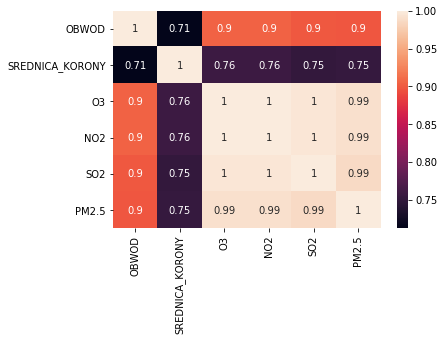

In [26]:
sns.heatmap(trees.corr(), annot=True)

In [27]:
le = preprocessing.LabelEncoder()
le.fit(trees['GATUNEK_Scientific'])


LabelEncoder()

In [28]:
le.classes_
transformed = le.transform(trees['GATUNEK_Scientific'])

In [29]:
trees['SPECIES'] = transformed

In [30]:
trees.head()

,GATUNEK_Scientific,OBWOD,SREDNICA_KORONY,O3,NO2,SO2,PM2.5,SPECIES
0,Populus alba,14,2.0,5.7,2.8,0.0,0.0,42
1,Populus tremula,17,3.0,8.5,2.8,0.0,0.0,46
2,Tilia cordata,10,1.0,0.0,0.0,0.0,0.0,73
3,Tilia cordata,10,4.0,0.0,0.0,0.0,0.0,73
4,Tilia cordata,10,5.0,0.0,0.0,0.0,0.0,73


In [31]:
trees['SPECIES'].unique()

array([42, 46, 73, 76, 74,  2, 24,  3,  4, 38, 13, 58, 40, 14, 18,  9, 36,
       22, 43, 44, 45, 35, 30, 19, 61, 72,  6, 20, 52, 55, 29, 32, 75, 77,
       68, 25,  8,  1, 63, 59,  5, 71, 47, 41, 60, 62, 69, 49, 51, 27, 26,
       17,  7, 31,  0, 21, 12, 34, 11, 56, 48, 28, 67, 64, 70, 57, 50, 54,
       23, 33, 53, 10, 66, 16, 65, 39, 15, 37])

In [32]:
top = trees.SPECIES.value_counts()
top.sort_values(ascending=False, inplace=True)
tops = list(top[:5].index)


In [33]:
lim = 10
y = data['Nazwa łacińska'].value_counts().values[:lim]
x = data['Nazwa łacińska'].value_counts().index[:lim]

[Text(0, 0, 'Acer platanoides'),
 Text(0, 0, 'Tilia cordata'),
 Text(0, 0, 'Acer negundo'),
 Text(0, 0, 'Betula pendula'),
 Text(0, 0, 'Acer saccharinum'),
 Text(0, 0, 'Tilia platyphyllos'),
 Text(0, 0, 'Quercus robur'),
 Text(0, 0, 'Fraxinus excelsior'),
 Text(0, 0, 'Robinia pseudoacacia'),
 Text(0, 0, 'Acer pseudoplatanus')]

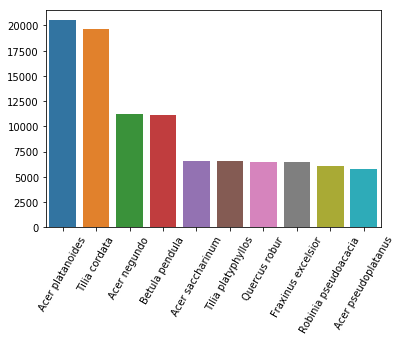

In [34]:
ax = sns.barplot(x=x, y=y)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)

In [35]:
le.inverse_transform(tops)

array(['Tilia cordata', 'Acer platanoides', 'Fraxinus pennsylvanica',
       'Quercus robur', 'Tilia  sp.'], dtype=object)

(0, 800.0)

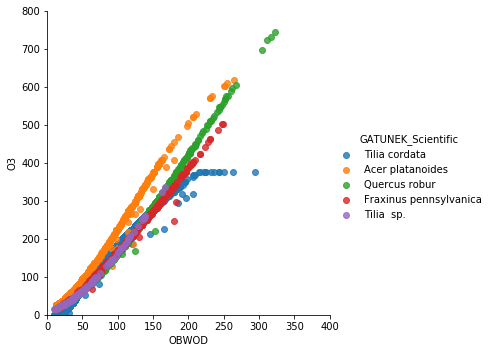

In [36]:
sns.lmplot(data=trees[trees['SPECIES'].isin(tops)], x='OBWOD', y='O3', hue='GATUNEK_Scientific', fit_reg=False, legend=True)
plt.xlim(0, 400.0)
plt.ylim(0, 800.0)

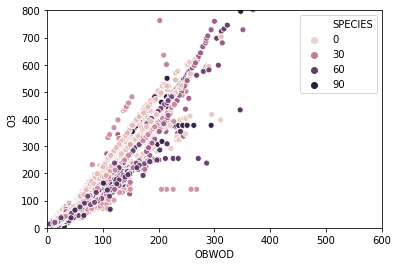

In [37]:
sns.scatterplot(data=trees, x='OBWOD', y='O3', hue='SPECIES')
plt.xlim(0, 600.0)
plt.ylim(0, 800.0)
plt.legend()

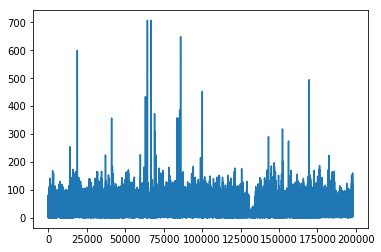

In [38]:
data['trunk_diam_cm'] = data['normalized_trunk_diam'] * 100
plt.plot(data['trunk_diam_cm'])

In [39]:
data['trunk_diam_cm'].describe()

count    195471.000000
mean         26.517391
std          20.966648
min           0.000000
25%           9.549297
50%          22.600002
75%          38.197186
max         707.284567
Name: trunk_diam_cm, dtype: float64

In [40]:
gatunki = pandas.read_csv('gatunki_warszawa_typ.csv')


In [41]:
gatunki['Nazwa lacinska'].sort_values().unique()

array(['**', 'Abies  sp.', 'Abies alba', 'Abies concolor',
       'Abies grandis ', 'Abies koreana', 'Abies nordmanniana',
       'Acer  sp.', 'Acer campestre', "Acer campestre 'Elsrijk'",
       "Acer campestre 'Nanum'", 'Acer negundo',
       "Acer negundo 'Flamingo'", "Acer negundo 'Odessanum'",
       "Acer negundo 'Variegatum'", 'Acer palmatum',
       "Acer palmatum 'Atropurpureum'", 'Acer pensylvanicum',
       'Acer platanoides', "Acer platanoides 'Drummondii'",
       "Acer platanoides 'Fassen's Black'", "Acer platanoides 'Globosum'",
       "Acer platanoides 'Royal red'", "Acer platanoides 'Schwedleri'",
       'Acer pseudoplatanus', "Acer pseudoplatanus 'Atropurpureum'",
       "Acer pseudoplatanus 'Brilantissimum'",
       "Acer pseudoplatanus 'Leopoldii'", "Acer pseudoplatanus 'Worley'",
       'Acer rubrum', "Acer rubrum 'Red Sunset'", 'Acer saccharinum',
       "Acer saccharinum 'Laciniatum Wieri'", 'Acer saccharum',
       'Acer tataricum', 'Acer tataricum subsp. Ginnal

In [42]:
trees['GATUNEK_Scientific'].sort_values().unique()

array(['Acer  sp.', 'Acer campestre', 'Acer negundo', 'Acer platanoides',
       'Acer pseudoplatanus', 'Acer rubrum', 'Acer saccharinum',
       'Acer tataricum', 'Aesculus  sp.', 'Aesculus hippocastanum',
       'Aesculus xcarnea', 'Betula  sp.', 'Betula papyrifera',
       'Betula pendula', 'Carpinus betulus', 'Castanea  sp.',
       'Catalpa  sp.', 'Catalpa bignonioides', 'Crataegus monogyna',
       'Crataegus sp.', 'Elaeagnus  sp.', 'Elaeagnus angustifolia',
       'Fagus sylvatica', 'Fraxinus  sp.', 'Fraxinus excelsior',
       'Fraxinus pennsylvanica', 'Ginkgo  sp.', 'Ginkgo biloba',
       'Gleditsia triacanthos', 'Juglans regia', 'Larix decidua',
       'Magnolia  sp.', 'Malus  sp.', 'Morus  sp.', 'Morus alba',
       'Picea abies', 'Picea pungens', 'Pinus nigra', 'Pinus sylvestris',
       'Platanus sp.', 'Platanus x hispanica', 'Populus  sp.',
       'Populus alba', 'Populus nigra', "Populus nigra 'Italica'",
       'Populus simonii', 'Populus tremula', 'Prunus  sp.(czereśn

In [43]:
len(data['Nazwa łacińska'].sort_values().unique())

353

In [44]:


COLUMNS = ['SREDNICA_KORONY', 'OBWOD', 'O3', 'NO2', 'SO2', 'PM2.5', ]
SUBS_TYPE = COLUMNS[2:]



def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [45]:
trees.head()

,GATUNEK_Scientific,OBWOD,SREDNICA_KORONY,O3,NO2,SO2,PM2.5,SPECIES
0,Populus alba,14,2.0,5.7,2.8,0.0,0.0,42
1,Populus tremula,17,3.0,8.5,2.8,0.0,0.0,46
2,Tilia cordata,10,1.0,0.0,0.0,0.0,0.0,73
3,Tilia cordata,10,4.0,0.0,0.0,0.0,0.0,73
4,Tilia cordata,10,5.0,0.0,0.0,0.0,0.0,73


In [46]:
trees.describe()

,OBWOD,SREDNICA_KORONY,O3,NO2,SO2,PM2.5,SPECIES
count,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000,6552.000000
mean,85.695208,3.916026,151.431181,88.133532,10.511538,7.938523,45.291209
std,65.832119,2.303265,127.897838,74.448851,8.840640,6.789392,27.954693
min,5.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2.000000,36.900000,19.800000,2.800000,2.800000,18.000000
50%,82.000000,4.000000,136.100000,79.400000,8.500000,8.500000,58.000000
75%,123.000000,5.000000,226.800000,130.400000,17.000000,11.300000,73.000000
max,1422.000000,44.000000,932.700000,544.300000,65.200000,48.200000,77.000000


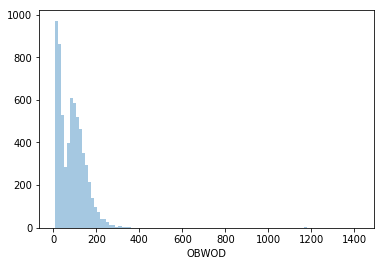

In [47]:
sns.distplot(trees['OBWOD'], kde=False, bins=100)

In [48]:
trees = trees[trees['OBWOD'] < 300]

In [49]:
trees.describe()

,OBWOD,SREDNICA_KORONY,O3,NO2,SO2,PM2.5,SPECIES
count,6526.000000,6526.000000,6526.000000,6526.000000,6526.000000,6526.000000,6526.000000
mean,84.109868,3.898682,149.075299,86.761401,10.346644,7.814603,45.301410
std,57.476043,2.280601,122.165937,71.105442,8.434167,6.491509,27.986116
min,5.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2.000000,36.900000,19.800000,2.800000,2.800000,18.000000
50%,82.000000,4.000000,136.100000,79.400000,8.500000,8.500000,58.000000
75%,123.000000,5.000000,224.000000,130.400000,14.200000,11.300000,73.000000
max,295.000000,44.000000,762.600000,442.300000,53.900000,39.700000,77.000000


In [50]:
data[['Nazwa łacińska', 'normalized_trunk_diam']].head()

,Nazwa łacińska,normalized_trunk_diam
0,Juglans regia,0.174723
1,Salix sp.,0.007118
2,Tilia cordata,0.337619
3,Carpinus sp.,0.015915
4,Carpinus sp.,0.015915


In [51]:
trees.dropna(inplace=True)
trees = trees[trees['OBWOD'] < 300]
trees = trees[trees['SREDNICA_KORONY'] < 20]
metrics.r2_score(trees['O3'], trees['NO2'])
trees['KORONA_NORM'] = trees['SREDNICA_KORONY'] * 100
trees['OBWOD_KW'] = trees['OBWOD'] ** 2
trees['OBWOD_SQ'] = np.sqrt(trees['OBWOD'])
trees['OBWOD_LOG'] = np.sqrt(trees['OBWOD'])

In [52]:
# Przewidywanie średnicy korony
x_train, x_validation, y_train, y_validation = train_test_split(
    trees[['OBWOD', 'OBWOD_KW']],
    trees['SREDNICA_KORONY'],
    test_size=0.25,
)

regression = LinearRegression()
regression.fit(
    x_train,
    y_train,
)

print(mean_absolute_percentage_error(y_train, regression.predict(x_train)))
print(r2_score(y_train, regression.predict(x_train)))

25.316571636728796
0.7096334566394183


In [53]:
def get_regression(trees_df, features):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[features],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    m_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    
    r2 = r2_score(y_validation, reg.predict(x_validation))
    return (reg, m_abs_err, r2)


feature_candidates = [
    ['OBWOD'],
    ['KORONA_NORM', 'OBWOD'],
    ['OBWOD', 'OBWOD_SQ'],
    ['OBWOD', 'OBWOD_KW'],
    ['OBWOD', 'OBWOD_LOG'],
    ['OBWOD', 'OBWOD_SQ', 'KORONA_NORM'],
]

ntimes = 50
for features in feature_candidates:
    agg_m_abs_err = 0
    for a in range(ntimes):
        (r, m_abs_err, r2) = get_regression(trees, features)
        # print(m_abs_err, r2)
        agg_m_abs_err += m_abs_err
    print(f'#### Average mean abs err: {agg_m_abs_err / ntimes} {features}')


#### Average mean abs err: 20.019214690079053 ['OBWOD']
#### Average mean abs err: 20.164076114408573 ['KORONA_NORM', 'OBWOD']
#### Average mean abs err: 19.264819332951433 ['OBWOD', 'OBWOD_SQ']
#### Average mean abs err: 19.577344278429663 ['OBWOD', 'OBWOD_KW']
#### Average mean abs err: 19.33647015416727 ['OBWOD', 'OBWOD_LOG']
#### Average mean abs err: 19.216320858688814 ['OBWOD', 'OBWOD_SQ', 'KORONA_NORM']


In [54]:
def get_regression(trees_df, features):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[features],
        trees_df['O3'],
        test_size=0.2,
    )
    reg = HuberRegressor()
    reg.fit(
        x_train,
        y_train,
    )
    m_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    
    r2 = r2_score(y_validation, reg.predict(x_validation))
    return (reg, m_abs_err, r2)


feature_candidates = [
    ['OBWOD'],
    ['KORONA_NORM', 'OBWOD'],
    ['OBWOD', 'OBWOD_SQ'],
    ['OBWOD', 'OBWOD_KW'],
    ['OBWOD', 'OBWOD_LOG'],
    ['OBWOD', 'OBWOD_SQ', 'KORONA_NORM'],
]

ntimes = 50
for features in feature_candidates:
    agg_m_abs_err = 0
    agg_r2 = 0
    for a in range(ntimes):
        (r, m_abs_err, r2) = get_regression(trees, features)
        # print(m_abs_err, r2)
        agg_m_abs_err += m_abs_err
        agg_r2 += r2
    print(f'#### Mean: {agg_m_abs_err / ntimes}, R2: {agg_r2 / ntimes} {features}')
    # print(f'#### Average r2: {agg_r2 / ntimes} {features}')


#### Mean: 19.939709481125632, R2: 0.9276966521209234 ['OBWOD']
#### Mean: 19.896602520874993, R2: 0.9291898407191381 ['KORONA_NORM', 'OBWOD']
#### Mean: 19.15935720693582, R2: 0.9272061711273827 ['OBWOD', 'OBWOD_SQ']
#### Mean: 19.628783345302892, R2: 0.9249582416189025 ['OBWOD', 'OBWOD_KW']
#### Mean: 19.21880103731805, R2: 0.9299950807955016 ['OBWOD', 'OBWOD_LOG']
#### Mean: 19.146664497242444, R2: 0.9319770717416579 ['OBWOD', 'OBWOD_SQ', 'KORONA_NORM']


In [55]:
from sklearn import linear_model
import xgboost

def get_regression(trees_df, features):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[features],
        trees_df['O3'],
        test_size=0.2,
    )
    xgdmat = xgboost.DMatrix(x_train, y_train)
    params = {'objective': 'reg:linear'}
    final_gb = xgboost.train(params, xgdmat)
    testdmat = xgboost.DMatrix(x_validation)
    y_pred = final_gb.predict(testdmat)

    m_abs_err = mean_absolute_error(y_validation, y_pred)
    
    r2 = r2_score(y_validation, y_pred)
    return (_, m_abs_err, r2)


feature_candidates = [
    ['OBWOD'],
    ['KORONA_NORM', 'OBWOD'],
    ['OBWOD', 'OBWOD_SQ'],
    ['OBWOD', 'OBWOD_KW'],
    ['OBWOD', 'OBWOD_LOG'],
    ['OBWOD', 'OBWOD_LOG', 'KORONA_NORM'],
]

ntimes = 20
m_abs_err = -1
r2 = -1

for features in feature_candidates:
    agg_m_abs_err = 0
    agg_r2 = 0
    for a in range(ntimes):
        (r, m_abs_err, r2) = get_regression(trees, features)
        # print(m_abs_err, r2)
        agg_m_abs_err += m_abs_err
        agg_r2 += r2
    print(f'#### Mean: {agg_m_abs_err / ntimes}, R2: {agg_r2 / ntimes} {features}')
    # print(f'#### Average r2: {agg_r2 / ntimes} {features}')


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['KORONA_NORM', 'OBWOD']],
        trees_df['O3'],
        test_size=0.2,
    )
    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    msqe = mean_absolute_error(y_train, reg.predict(x_train))
    print(msqe)
    
    print(r2_score(y_validation, reg.predict(x_validation)))

    
    return reg

reg_o3 = get_reg(trees)

a1, a2, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.intercept_

fn = a1 * trees['KORONA_NORM'] + a2 * trees['OBWOD'] + b

plt.plot(fn, trees['OBWOD'], 'b.')
plt.scatter(trees['O3'], trees['OBWOD'], c='g', alpha=0.3)


In [ ]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    msqe = mean_absolute_error(y_train, reg.predict(x_train))
    print(msqe)
    
    print(r2_score(y_validation, reg.predict(x_validation)))

    
    return reg

reg_o3 = get_reg(trees)

a, b = reg_o3.coef_[0], reg_o3.intercept_

fn = a * trees['OBWOD'] + b

plt.plot(fn, trees['OBWOD'], 'b.')
plt.scatter(trees['O3'], trees['OBWOD'], c='g', alpha=0.3)


In [ ]:
y = trees[['O3']].fillna(0.0)
x = pandas.concat([pandas.get_dummies(trees['SPECIES']), trees[['OBWOD']]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(trees[['OBWOD']], y, test_size=0.25)

lr = LinearRegression()

results = {}


metric = 'O3'

lr.fit(x_train, np.array(y_train[metric]))

R_2 = int(round(lr.score(x_test, y_test[metric]), 2) * 100)

mape = mean_absolute_percentage_error(y_test[metric], lr.predict(x_test))

msqe = mean_squared_error(y_test[metric], lr.predict(x_test))

print(f'Przy estymacji {metric} R^2 wynosi {R_2}%, a średni procentowy błąd - {mape}')

print(f'Parametry modelu: {lr.coef_, lr.intercept_} - odpowiednio obwód, średnica korony, i wyraz wolny')
print('*' * 100)
pred = lr.predict(np.array([[127.0, ]]))
results[metric] = pred
print(results)

In [ ]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_KW']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(mean_abs_err)
    
    print(r2_score(y_validation, reg.predict(x_validation)))
    return reg

reg_o3 = get_reg(trees)

a1, a2, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.intercept_

fn = a1 * trees['OBWOD'] + a2 * trees['OBWOD_KW'] + b

plt.plot(fn, trees['OBWOD'], 'b.')
plt.scatter(trees['O3'], trees['OBWOD'], c='g', alpha=0.3)


In [ ]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_SQ']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(mean_abs_err)
    
    print(r2_score(y_validation, reg.predict(x_validation)))

    
    return reg

reg_o3 = get_reg(trees)

a1, a2, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.intercept_

fn = a1 * trees['OBWOD'] + a2 * trees['OBWOD_SQ'] + b

plt.plot(fn, trees['OBWOD'], 'b.')
plt.scatter(trees['O3'], trees['OBWOD'], c='g', alpha=0.3)


In [ ]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_SQ', 'KORONA_NORM']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(mean_abs_err)
    
    print(r2_score(y_validation, reg.predict(x_validation)))

    return reg

reg_o3 = get_reg(trees)

a1, a2, a3, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.coef_[2], reg_o3.intercept_

fn = a1 * trees['OBWOD'] + a2 * trees['OBWOD_SQ'] + a3 * trees['KORONA_NORM'] + b

plt.plot(fn, trees['KORONA_NORM'], 'b.')
plt.scatter(trees['O3'], trees['KORONA_NORM'], c='g', alpha=0.3)


In [ ]:
# trzy-ficzerowa

def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_SQ', 'KORONA_NORM']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = LinearRegression()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(mean_abs_err)
    
    print(r2_score(y_validation, reg.predict(x_validation)))

    return reg, x_train

reg_o3, x_train = get_reg(trees)

a1, a2, a3, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.coef_[2], reg_o3.intercept_

fn = a1 * trees['OBWOD'] + a2 * trees['OBWOD_SQ'] + a3 * trees['KORONA_NORM'] + b

sns.distplot(reg_o3.predict(x_train), kde=False, bins=50, color='r', label='predykcja')
sns.distplot(trees['O3'], kde=False, bins=50, color='g', label='real')
plt.legend()


In [ ]:
def get_reg(trees_df):
    x_train, x_validation, y_train, y_validation = train_test_split(
        trees_df[['OBWOD', 'OBWOD_SQ']],
        trees_df['O3'],
        test_size=0.2,
    )

    reg = HuberRegressor()
    reg.fit(
        x_train,
        y_train,
    )
    mean_abs_err = mean_absolute_error(y_train, reg.predict(x_train))
    print(f'MErr: {mean_abs_err}')
    
    print(f'R2:   {r2_score(y_validation, reg.predict(x_validation))}')
    return reg, x_train

reg_o3, x_train = get_reg(trees)

a1, a2, b = reg_o3.coef_[0], reg_o3.coef_[1], reg_o3.intercept_

fn = a1 * trees['OBWOD'] + a2 * trees['OBWOD_SQ'] + b

sns.distplot(reg_o3.predict(x_train), kde=False, bins=50, color='r', label='predykcja')
sns.distplot(trees['O3'], kde=False, bins=50, color='g', label='real')
plt.legend()
